In [1]:
import pandas as pd
import numpy as np
import forestplot as fp
import seaborn as sns
from matplotlib.ticker import MultipleLocator
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams.update({'font.size': 14, 'axes.linewidth': 2, 'xtick.major.width': 1.5, 'xtick.major.size': 5, 'ytick.major.width': 1.5, 'ytick.major.size': 4})
from matplotlib.backends.backend_pdf import PdfPages


In [2]:
enrich_file = "/data5/deepro/ukbiobank/papers/bmi_project/4_characterization/white_british/data/enrichment/gwas/gwas_enrichment.csv"

In [3]:
stats = pd.read_csv(enrich_file)

In [4]:
df = stats.loc[stats.FDR<0.05]

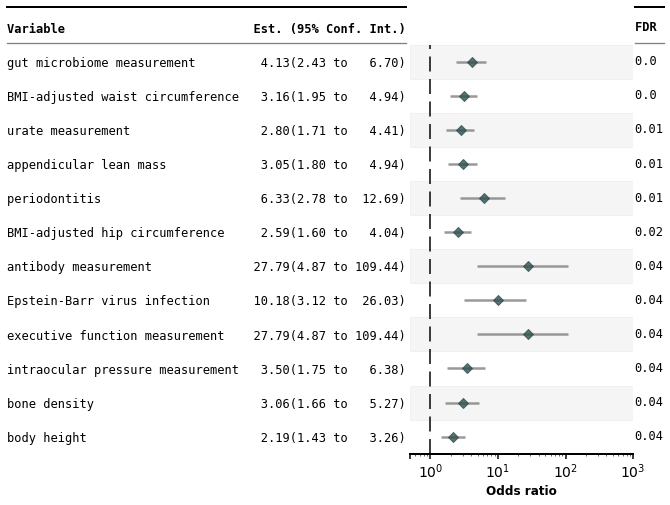

In [5]:
fig_ax = fp.forestplot(df,  # the dataframe with results data
              estimate="oddsratio",  # col containing estimated effect size 
              ll="conf_int_lower", hl="conf_int_upper",  # columns containing conf. int. lower and higher limits
              varlabel="gwas_phenotype",  # column containing variable label
              logscale=True, 
              xlabel="Odds ratio",  # x-label title
              pval="FDR",  # Column of p-value to be reported on right
              color_alt_rows=True,  # Gray alternate rows
              table=True,  # Format as a table
              annote=["est_ci"],  # columns to report on left of plot
              annoteheaders=["Est. (95% Conf. Int.)"],  # ^corresponding headers
              rightannote=["formatted_pval"],
              right_annoteheaders=["FDR"],
              starpval=False,
              # Additional kwargs for customizations
              **{"marker": "D",  # set maker symbol as diamond
                 "markersize": 50,  # adjust marker size
                 "xlinestyle": (0, (10, 5)),  # long dash for x-reference line 
                 "xlinecolor": "k",  # gray color for x-reference line
                 "xtick_size": 14,  # adjust x-ticker fontsize,
                 "xline": 1,
                 "xlinewidth": 1.5,
                 "xticks": [0.5, 1, 10, 100, 1000],
                 "lw": 2.5,
                }  
              )